In [1]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Utils
from utils.plot_utils import newplot

# Import some useful functions
from scipy.special import lambertw


In [18]:
# Leading log sudakov factor for angularities
def p_angularity(e, beta = 1.0, alpha_s = 0.12, C_i = 4/3):
    """Leading log sudakov factor for angularities"""

    Delta = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(np.log(e),2) )

    return np.nan_to_num((-2 * alpha_s * C_i) / np.pi  * np.log(e) / (beta * e) * Delta)

def p_l_given_angularity(l, e, beta = 1.0, alpha_s = 0.12, C_i = 4/3):

    x = beta * l / e
    W = lambertw(x)
    z0 = e * np.exp(W)

    theta_1 = e > 0
    theta_2 = l > 0
    theta_3 = z0 > 0
    theta_4 = z0 < 1
    theta = theta_1 * theta_2 * theta_3 * theta_4

    p = -beta / (1 * np.log(e)) * np.abs(1 / (z0 + beta*l))
    return np.real(np.nan_to_num(p * theta))


# Calculate p_l by multipling p_l_given_angularity by p_angularity and integrating over e
def p_l(l, beta = 1.0, alpha_s = 0.12, C_i = 4/3):
    """Leading log sudakov factor for angularities"""

    # Compute the integral. l can be a numpy array

    # # Method 1
    # e = np.linspace(0.000, 1, 10001)
    # p1 = p_l_given_angularity(l[:,None], e[None,:], beta, alpha_s, C_i)
    # p2 = p_angularity(e[None,:], beta, alpha_s, C_i)
    # p = p1 * p2


    # Method 2
    loge = -np.logspace(-10,10, 10001)[::-1]
    x = beta * l[:,None] * np.exp(-loge[None,:]) 
    term1 = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(loge[None,:],2) )
    term2 = 2 * alpha_s * C_i  / (beta * np.pi)
    term3 = 1/(beta * l[:,None]) * lambertw(x) / (lambertw(x) + 1)
    p = np.nan_to_num(term1 * term2 * term3 * (l[:,None] > 0) * ((-beta * l[:,None]) - loge[None,:] > 0))

    

    return np.real(np.trapz(p, loge))

def p_l_analytic(l, beta = 1.0, alpha_s = 0.12, C_i = 4/3):
    """Leading log sudakov factor for angularities"""


    term1 = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(l,2) )
    derivative = -2 * alpha_s * C_i * l / (beta * np.pi) 

    return term1 * derivative

def cdf_analytic(l, beta = 1.0, alpha_s = 0.12, C_i = 4/3):
    """Leading log sudakov factor for angularities"""

    term1 = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(l,2) )

    return term1

/tmp/ipykernel_10599/1581978343.py:5: RuntimeWarning: divide by zero encountered in log
  Delta = np.exp(-1 * alpha_s * C_i /  (beta * np.pi) *  np.power(np.log(e),2) )
/tmp/ipykernel_10599/1581978343.py:7: RuntimeWarning: divide by zero encountered in log
  return np.nan_to_num((-2 * alpha_s * C_i) / np.pi  * np.log(e) / (beta * e) * Delta)
/tmp/ipykernel_10599/1581978343.py:7: RuntimeWarning: invalid value encountered in multiply
  return np.nan_to_num((-2 * alpha_s * C_i) / np.pi  * np.log(e) / (beta * e) * Delta)
/tmp/ipykernel_10599/1581978343.py:11: RuntimeWarning: divide by zero encountered in true_divide
  x = beta * l / e
/tmp/ipykernel_10599/1581978343.py:13: RuntimeWarning: invalid value encountered in multiply
  z0 = e * np.exp(W)
/tmp/ipykernel_10599/1581978343.py:21: RuntimeWarning: divide by zero encountered in log
  p = -beta / (1 * np.log(e)) * np.abs(1 / (z0 + beta*l))
/tmp/ipykernel_10599/1581978343.py:21: RuntimeWarning: invalid value encountered in true_divide
  p 

0.9451509300391528
0.0
0.9981457196366972
0.9990035978490202
0.9988731367205096
0.9981974556963179
1.0009558075588751
1.0003834103493352
1.0038207881097618
1.0055331011780164
0.9996542276182684
0.0


/tmp/ipykernel_10599/1581978343.py:43: RuntimeWarning: invalid value encountered in multiply
  term3 = 1/(beta * l[:,None]) * lambertw(x) / (lambertw(x) + 1)
/tmp/ipykernel_10599/1581978343.py:43: RuntimeWarning: invalid value encountered in true_divide
  term3 = 1/(beta * l[:,None]) * lambertw(x) / (lambertw(x) + 1)


[8.94099107e+01 8.92866762e+01 8.91629265e+01 ... 7.71820107e-05
 6.26325284e-05 5.04823183e-05]
0.999805860355885


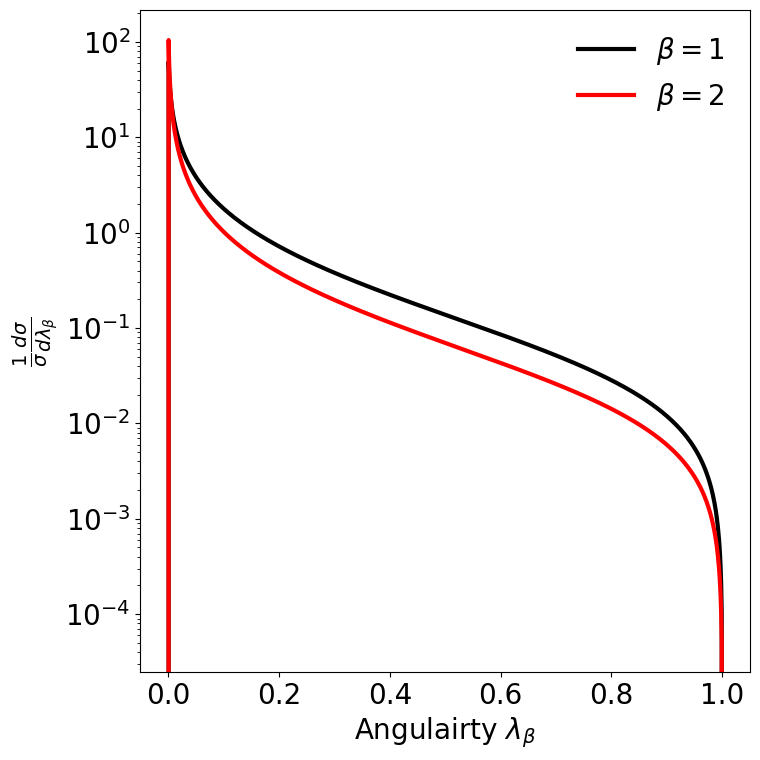

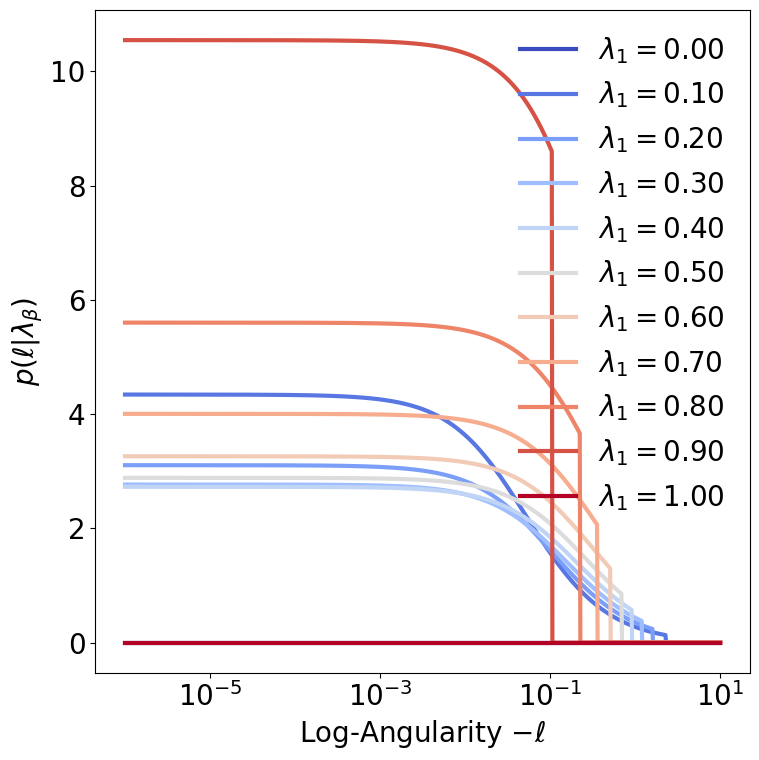

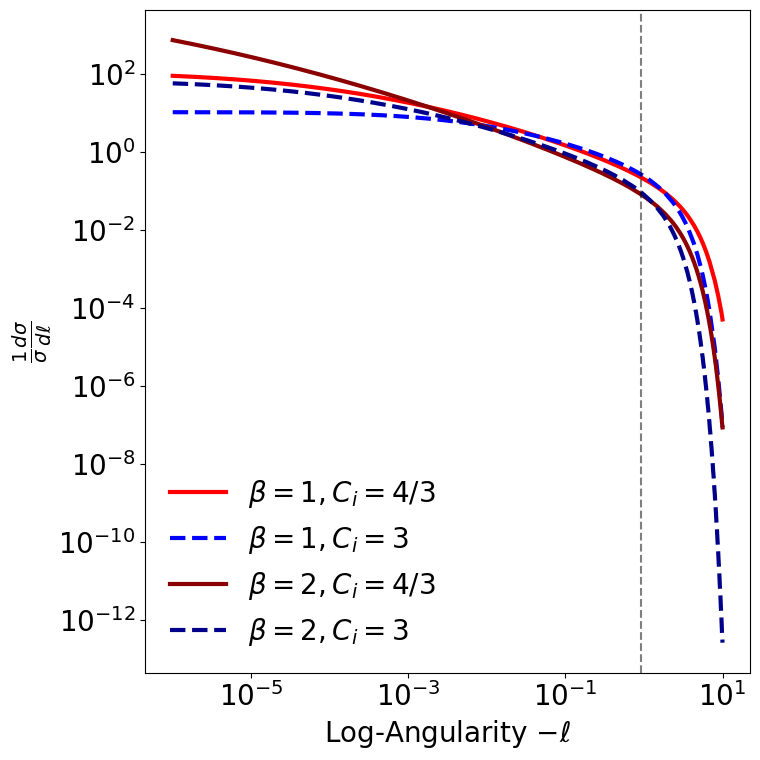

In [19]:
# Plots
angularities = np.linspace(0.000, 1, 1001)
ls = np.logspace(-6, 1, 1001)

# Plot of p(e)
newplot()
plt.plot(angularities, p_angularity(angularities), label = r'$\beta = 1$', lw = 3, color = 'black')
plt.plot(angularities, p_angularity(angularities, beta = 2), label = r'$\beta = 2$', lw = 3, color = 'red')
print(np.trapz(p_angularity(angularities), angularities))

plt.legend(frameon = False)
plt.xlabel(r'Angulairty $\lambda_{\beta}$')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d\lambda_{\beta}}$')
plt.yscale('log')

# Plot of p(l | e):
newplot()  
for e in np.linspace(0.00, 1, 11):
    plt.plot(ls, p_l_given_angularity(ls, e), label = rf'$\lambda_{1} = {e : .2f}$', lw = 3, color = plt.cm.coolwarm(e))
    print(np.trapz(p_l_given_angularity(ls, e), ls))
# plt.plot(-ls, p_l_given_angularity(ls, 0.1), label = r'$\lambda_{1} = 0.1$', color = 'black')

plt.legend(frameon = False)
plt.xlabel(r'Log-Angularity $-\ell$')
plt.ylabel(r'$p(\ell | \lambda_\beta)$')
plt.xscale('log')

# Plot of p(l)
newplot()
print(p_l(ls))

# Plot for C_i = 4/3 (solid, red) and C_i = 3 (dashed, blue)
# plt.plot(-ls, p_l(ls), label = r'$\beta = 1, C_i = 4/3$', lw = 3, color = 'red')
# plt.plot(-ls, p_l(ls, C_i = 3), label = r'$\beta = 1, C_i = 3$', lw = 3, color = 'blue', ls = "--")

# Plot the same as above but with analytic expression:
plt.plot(ls, p_l(ls), label = r'$\beta = 1, C_i = 4/3$', lw = 3, color = 'red')
plt.plot(ls, p_l(ls, C_i = 3), label = r'$\beta = 1, C_i = 3$', lw = 3, color = 'blue', ls = "--")

# Plot the same as above but for beta = 2, using dark colors:
plt.plot(ls, p_l(ls, beta = 2), label = r'$\beta = 2, C_i = 4/3$', lw = 3, color = 'darkred')
plt.plot(ls, p_l(ls, beta = 2, C_i = 3), label = r'$\beta = 2, C_i = 3$', lw = 3, color = 'darkblue', ls = "--")

# Draw a vertical line, and text near it darkbluethat says log(1/R)
plt.axvline(-np.log(0.4), color = 'black', ls = "--", alpha = 0.5)
plt.yscale('log')
# plt.text(-np.log(0.4) * 1.1, 10.1, r'$\ell = \log(R)$', rotation = 90, va = 'center', ha = 'right', color = 'black', alpha = 0.5)



# Numerically compute the integral of p_l against l
integral = np.trapz(p_l(ls), ls)
print(integral)

# Draw a large arrow facing to the right
# plt.annotate("", xy=(0.4, 0.1), xytext=(0.4, 0.9), arrowprops=dict(arrowstyle="->", color = 'black'))

# plt.plot(-ls, p_l(ls, beta = 2), label = r'$\beta = 2$', lw = 3, color = 'red')

plt.legend(frameon = False)
plt.xlabel(r'Log-Angularity $-\ell$')
plt.ylabel(r'$\frac{1}{\sigma}\frac{d\sigma}{d\ell}$')
plt.xscale('log')



/tmp/ipykernel_10599/1581978343.py:40: RuntimeWarning: overflow encountered in exp
  x = beta * l[:,None] * np.exp(-loge[None,:])
/tmp/ipykernel_10599/1581978343.py:40: RuntimeWarning: overflow encountered in multiply
  x = beta * l[:,None] * np.exp(-loge[None,:])
/tmp/ipykernel_10599/1581978343.py:43: RuntimeWarning: invalid value encountered in multiply
  term3 = 1/(beta * l[:,None]) * lambertw(x) / (lambertw(x) + 1)
/tmp/ipykernel_10599/1581978343.py:43: RuntimeWarning: invalid value encountered in true_divide
  term3 = 1/(beta * l[:,None]) * lambertw(x) / (lambertw(x) + 1)


[1.00000000e-06 1.87442741e-02 3.75043349e-02 ... 7.89095768e+01
 8.42777484e+01 9.81747943e+01]
[1.00000000e-06 1.60640231e-04 3.31125653e-04 ... 9.50673700e+00
 1.04379918e+01 9.81747943e+01]
[1.00000000e-06 1.47554513e-05 3.18862434e-05 ... 6.42469194e+00
 7.09605055e+00 9.81747943e+01]
[1.00000000e-06 1.73532333e-06 2.65735660e-06 ... 4.32366076e+00
 4.80612162e+00 9.81747943e+01]
[1.00000000e-06 1.00000000e-06 1.01058973e-06 ... 5.10878186e-01
 5.83353921e-01 9.81747943e+01]


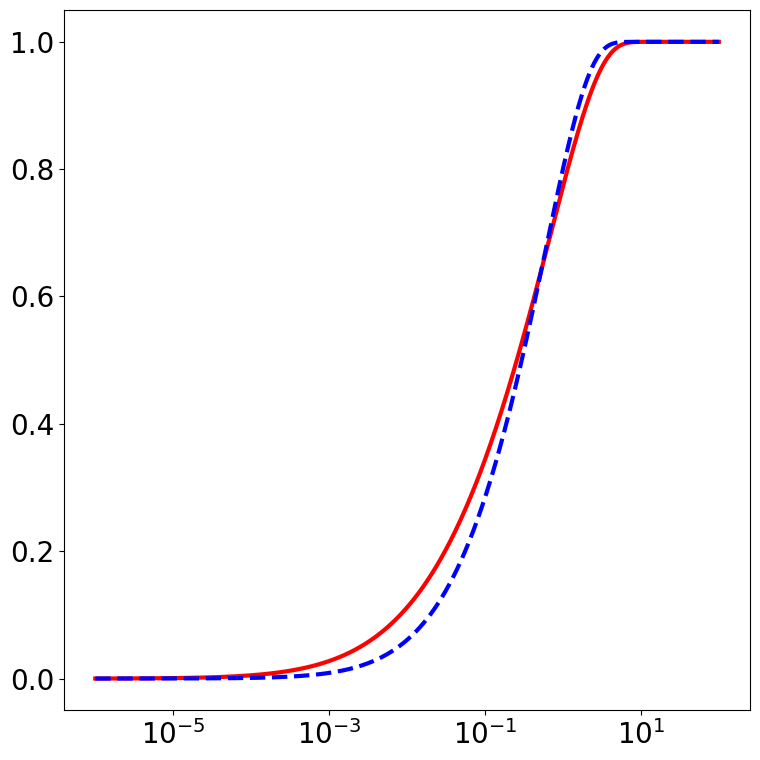

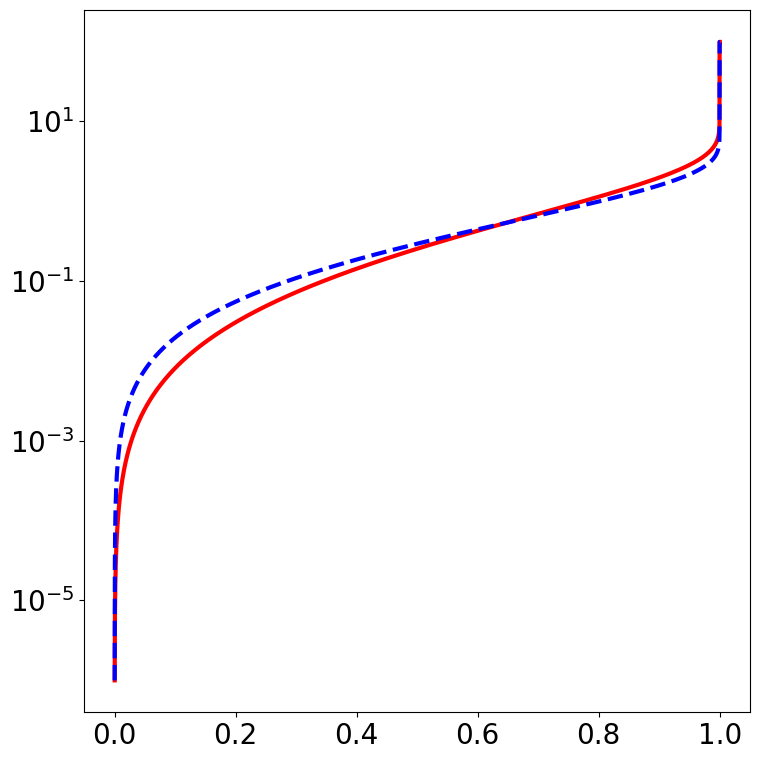

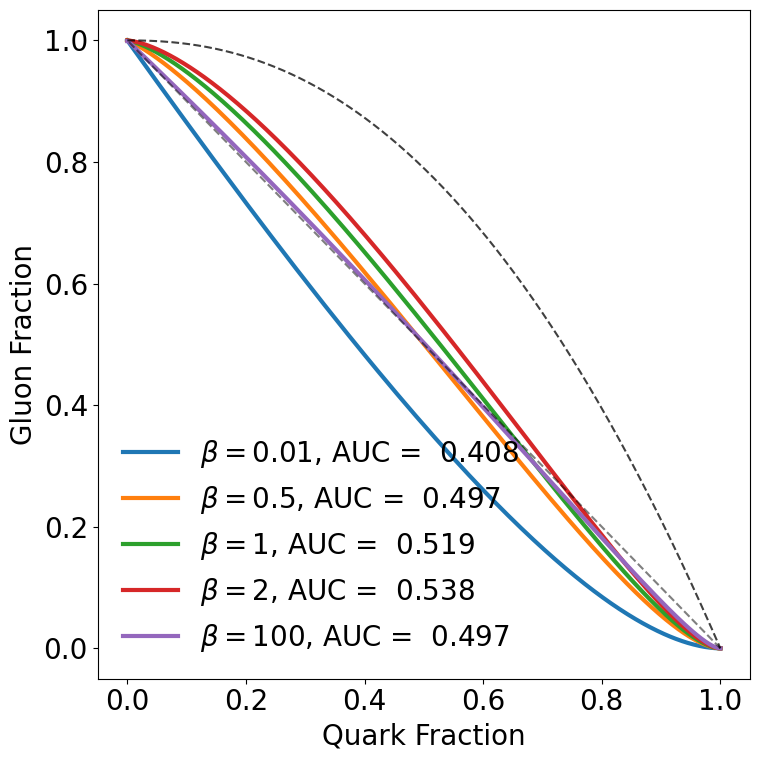

In [31]:
# Function to interpolate the value of l for a given cumulative probability for either C_i = 4/3 or C_i = 3:
def l_from_cdf(cdf, ls, p):

    # Interpolate in log space:
    return np.nan_to_num(np.interp(p, cdf, ls))

# Function to interpolate the CDF:
def cdf_from_l(cdf, ls, l):
    return np.nan_to_num(np.interp(np.log(l), np.log(ls), cdf))

# Get the cumulative distribution functions for C_i = 4/3 and C_i = 3 using cumulative trapezoid:
cdf_4_3 = integrate.cumtrapz(p_l(ls), ls)
cdf_3 = integrate.cumtrapz(p_l(ls, C_i = 3), ls)
ps = np.linspace(0, 1, 10001)
ls = np.logspace(-6, 2, 1001)

# Plot the cumulative distribution functions vs l:
newplot()
plt.plot(ls[:-1], cdf_4_3, label = r'$C_i = 4/3$', lw = 3, color = 'red')
plt.plot(ls[:-1], cdf_3, label = r'$C_i = 3$', lw = 3, color = 'blue', ls = "--")

plt.xscale('log')

# Plot the inverse of the cumulative distribution functions vs p using interpolation:
newplot()
plt.plot(ps, l_from_cdf(cdf_4_3, ls[:-1], ps), label = r'$C_i = 4/3$', lw = 3, color = 'red')
plt.plot(ps, l_from_cdf(cdf_3, ls[:-1], ps), label = r'$C_i = 3$', lw = 3, color = 'blue', ls = "--")

plt.yscale('log')

# Normalize the cumulative distribution functions:
cdf_4_3 /= cdf_4_3[-1]
cdf_3 /= cdf_3[-1]




# plt.yscale('log')

# # Get the cdf for C_i=3 as a function of the inverse of the cdf for C_i=4/3:

# cdf_3_from_4_3 = np.nan_to_num(np.interp(cdf_4_3, cdf_3, np.log(-ls[:-1]),))
# newplot()
# plt.plot(cdf_4_3, cdf_3_from_4_3)

# # Function to interpolate the value of l for a given cumulative probability for either C_i = 4/3 or C_i = 3:
# def l_from_cdf(cdf, ls, p):

#     # Interpolate in log space:
#     return np.nan_to_num(np.interp(np.log(p), cdf, np.log(-ls[:-1])))

# # Function to interpolate the CDF:
# def cdf_from_l(cdf, ls, l):
#     return np.nan_to_num(np.interp(np.log(-l), np.log(-ls[:-1]), cdf))

# ROC Curve:
def ROC_curve(beta = 1):
    """ROC curve for log-angularities"""

    # Get the cumulative distribution functions for C_i = 4/3 and C_i = 3 using cumulative trapezoid:
    cdf_4_3 = integrate.cumtrapz(p_l(ls, beta = beta), ls)
    cdf_3 = integrate.cumtrapz(p_l(ls, beta = beta, C_i = 3), ls)

    # normalize the cumulative distribution functions:
    cdf_4_3 /= cdf_4_3[-1]
    cdf_3 /= cdf_3[-1]

    # newplot()
    # plt.plot(ls[:-1], cdf_4_3, label = r'$C_i = 4/3$', lw = 3, color = 'red')
    # plt.plot(ls[:-1], cdf_3, label = r'$C_i = 3$', lw = 3, color = 'blue')
    # plt.axvline(np.exp(1), alpha = 0.25, color = "black")
    # plt.xscale('log')
    # plt.xlim(1e-4, 1e4)


    ps = np.linspace(0, 1, 1001)
    ls_4_3 = l_from_cdf(cdf_4_3, ls[:-1], ps)
    print(ls_4_3)
    roc_points = cdf_from_l(cdf_3, ls[:-1], ls_4_3)

    return ps, 1-roc_points, 1-np.trapz(roc_points, ps)


# # Plot the cumulative distribution functions vs l:
# newplot()
# plt.plot(-ls[:-1], cdf_4_3, label = r'$C_i = 4/3$', lw = 3, color = 'red')
# plt.plot(-ls[:-1], cdf_3, label = r'$C_i = 3$', lw = 3, color = 'blue', ls = "--")

# plt.legend(frameon = False)
# plt.xlabel(r'Log-Angularity $-\ell$')
# plt.ylabel(r'$\Sigma(\ell)$')
# plt.xscale('log')


# Plot the ROC curve for several values of beta and print their AUC:
newplot()
for beta in [0.01, 0.5, 1,2, 100]:
    ps, roc_points, auc = ROC_curve(beta)
    plt.plot(ps, roc_points, label = rf'$\beta = {beta}$, AUC = {auc : .3f}', lw = 3)

    plt.legend(frameon = False)
    plt.xlabel("Quark Fraction")
    plt.ylabel("Gluon Fraction")

# Plot diagonal line:
plt.plot([1,0], [0,1], color = 'black', alpha = 0.5, ls = "--")

# Plot the curve x^(9/4)
x = np.linspace(0,1,1001)
plt.plot(x, 1-x**(9/4), color = 'black', alpha = 0.75, ls = "--")